1. Introduction
2. Getting Started with spaCy
- spaCy’s Statistical Models
- spaCy’s Processing Pipeline
3. spaCy in Action
- 1. Part-of-Speech (POS) Tagging using spaCy
- 2. Dependency Parsing using spaCy
- 3. Named Entity Recognition using spaCy
- 4. Rule-Based Matching using spaCy
4. Conclusion

# Bắt đầu với spaCy
Nếu bạn mới biết đến spaCy, có một số điều bạn cần lưu ý:

spaCy’s Statistical Models
spaCy’s Processing Pipeline

Chúng ta hãy thảo luận chi tiết từng vấn đề.

## Các mô hình thống kê của spaCy

Các mô hình này là động cơ điện của spaCy. Các mô hình này cho phép spaCy thực hiện một số tác vụ liên quan đến NLP, chẳng hạn như gắn thẻ từ loại, nhận dạng thực thể được đặt tên và phân tích phụ thuộc.

Tôi đã liệt kê bên dưới các mô hình thống kê khác nhau trong spaCy cùng với thông số kỹ thuật của chúng:

- en_core_web_sm: CNN đa nhiệm tiếng Anh được đào tạo trên OntoNotes. Kích thước – 11 MB
- en_core_web_md: CNN đa nhiệm tiếng Anh được đào tạo trên OntoNotes, với các vectơ GloVe được đào tạo trên Common Crawl. Kích thước – 91 MB
- en_core_web_lg: CNN đa nhiệm tiếng Anh được đào tạo trên OntoNotes, với các vectơ GloVe được đào tạo trên Common Crawl. Kích thước – 789 MB

Việc nhập các mô hình này cực kỳ dễ dàng. Chúng ta có thể nhập một mô hình chỉ bằng cách thực thi spacy.load('model_name') như được hiển thị bên dưới:

In [2]:
import spacy
nlp = spacy.load('en_core_web_sm')

## Đường ống xử lý của spaCy
Bước đầu tiên đối với chuỗi văn bản, khi làm việc với spaCy, là truyền nó đến một đối tượng NLP . Đối tượng này về cơ bản là một đường ống gồm một số hoạt động xử lý trước văn bản mà chuỗi văn bản đầu vào phải trải qua.

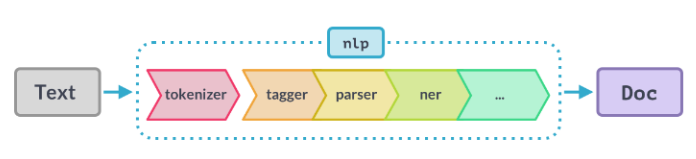

Như bạn có thể thấy trong hình trên, quy trình NLP có nhiều thành phần, chẳng hạn như tokenizer , tagger , parser , ner , v.v. Vì vậy, chuỗi văn bản đầu vào phải đi qua tất cả các thành phần này trước khi chúng ta có thể làm việc với nó.

Để tôi chỉ cho bạn cách tạo một đối tượng NLP :

Bạn có thể sử dụng mã bên dưới để tìm ra các thành phần đường ống đang hoạt động:
```nlp.pipe_names```

In [3]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Create an nlp object
doc = nlp("He went to play basketball")

nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

Trong trường hợp bạn muốn vô hiệu hóa các thành phần đường ống và chỉ giữ cho trình phân tích mã thông báo hoạt động, thì bạn có thể sử dụng mã bên dưới để vô hiệu hóa các thành phần đường ống:

```nlp.disable_pipes('tagger', 'parser')```

In [6]:
nlp.disable_pipe('tagger')
nlp.disable_pipe('parser')

nlp.pipe_names

['tok2vec', 'attribute_ruler', 'lemmatizer', 'ner']

# spaCy trong hành động
Bây giờ, hãy cùng bắt tay vào làm với spaCy. Trong phần này, bạn sẽ học cách thực hiện nhiều tác vụ NLP khác nhau bằng spaCy. Chúng ta sẽ bắt đầu với các tác vụ NLP phổ biến là Đánh dấu từ loại, Phân tích phụ thuộc và Nhận dạng thực thể có tên.

## 1. Đánh dấu từ loại(Part-of-speech) (POS) bằng spaCy
Trong ngữ pháp tiếng Anh, các thành phần của câu cho chúng ta biết chức năng của một từ là gì và cách sử dụng nó trong câu.  Một số thành phần phổ biến của câu trong tiếng Anh là Danh từ, Đại từ, Tính từ, Động từ, Trạng từ, v.v.

Gắn thẻ POS là nhiệm vụ tự động gán thẻ POS cho tất cả các từ trong một câu. Nó hữu ích trong nhiều tác vụ hạ nguồn trong NLP, chẳng hạn như kỹ thuật tính năng, hiểu ngôn ngữ và trích xuất thông tin.

Thực hiện gắn thẻ POS trong spaCy là việc vô cùng dễ dàng:

In [7]:
import spacy 
nlp = spacy.load('en_core_web_sm')

# Create an nlp object
doc = nlp("He went to play basketball")
 
# Iterate over the tokens
for token in doc:
    # Print the token and its part-of-speech tag
    print(token.text, "-->", token.pos_)

He --> PRON
went --> VERB
to --> PART
play --> VERB
basketball --> NOUN


Vì vậy, mô hình đã xác định đúng các thẻ POS cho tất cả các từ trong câu. Trong trường hợp bạn không chắc chắn về bất kỳ thẻ nào trong số này, thì bạn chỉ cần sử dụng spacy.explain() để tìm ra:

In [14]:
spacy.explain('PRON')

'pronoun'

## 2. Phân tích phụ thuộc(Dependency Parsing) sử dụng spaCy
Mỗi câu đều có cấu trúc ngữ pháp và với sự trợ giúp của phân tích phụ thuộc, chúng ta có thể trích xuất cấu trúc này. Nó cũng có thể được coi là một đồ thị có hướng, trong đó các nút tương ứng với các từ trong câu và các cạnh giữa các nút là các phụ thuộc tương ứng giữa các từ.

In [15]:
for token in doc:
    print(token.text, "-->", token.dep_)

He --> nsubj
went --> ROOT
to --> aux
play --> advcl
basketball --> dobj


Thẻ phụ thuộc ROOT biểu thị động từ hoặc hành động chính trong câu. Các từ khác được kết nối trực tiếp hoặc gián tiếp với từ ROOT của câu. Bạn có thể tìm hiểu các thẻ khác biểu thị cho điều gì bằng cách thực thi mã bên dưới:

In [16]:
spacy.explain("nsubj"), spacy.explain("ROOT"), spacy.explain("aux"), spacy.explain("advcl"), spacy.explain("dobj")

('nominal subject',
 'root',
 'auxiliary',
 'adverbial clause modifier',
 'direct object')

## 3. Nhận dạng thực thể được đặt tên bằng spaCy

Trước tiên, chúng ta hãy tìm hiểu thực thể là gì. Thực thể là những từ hoặc nhóm từ biểu diễn thông tin về những thứ phổ biến như con người, địa điểm, tổ chức, v.v. Những thực thể này có tên riêng.

Ví dụ, hãy xem xét câu sau:

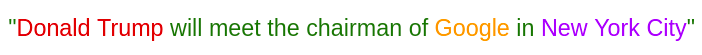

Trong câu này, các thực thể là “Donald Trump”, “Google” và “Thành phố New York”.

Bây giờ chúng ta hãy xem spaCy nhận dạng các thực thể được đặt tên trong một câu như thế nào.

In [4]:
import spacy

nlp = spacy.load('en_core_web_sm')

text = '''Donald Trump will meet the chairman of Google in New York City'''

doc = nlp(text)

# Duyệt qua từng token và in thông tin thực thể
for token in doc:
    print(token.text, "->", token.ent_type_)

# Duyệt qua từng thực thể và in thông tin
for ent in doc.ents:
    print(ent.text, ent.label_)

Donald -> PERSON
Trump -> PERSON
will -> 
meet -> 
the -> 
chairman -> 
of -> 
Google -> ORG
in -> 
New -> GPE
York -> GPE
City -> GPE
Donald Trump PERSON
Google ORG
New York City GPE


In [5]:
print(spacy.explain('GPE'))
spacy.explain('ORG')

Countries, cities, states


'Companies, agencies, institutions, etc.'

## 4. Rule-Based Matching using spaCy
Rule-based matching is a new addition to spaCy’s arsenal. With this spaCy matcher, you can find words and phrases in the text using user-defined rules.

Trong khi Biểu thức chính quy sử dụng các mẫu văn bản để tìm từ và cụm từ, trình so khớp spaCy không chỉ sử dụng các mẫu văn bản mà còn sử dụng các thuộc tính từ vựng của từ, chẳng hạn như thẻ POS, thẻ phụ thuộc, từ nguyên, v.v.

In [9]:
import spacy
nlp = spacy.load('en_core_web_sm')

# Import spaCy Matcher
from spacy.matcher import Matcher

# Initialize the matcher with the spaCy vocabulary
matcher = Matcher(nlp.vocab)

doc = nlp("Some people start their day with lemon water")

# Define rule
pattern = [{'TEXT': 'lemon'}, {'TEXT': 'water'}]

# Add rule
matcher.add('rule_1', [pattern])

Vì vậy, trong đoạn mã trên:

- Đầu tiên, chúng ta nhập spaCy matcher
- Sau đó, chúng tôi khởi tạo đối tượng matcher với từ vựng spaCy mặc định
- Sau đó, chúng ta truyền dữ liệu đầu vào vào một đối tượng NLP như bình thường
- Ở bước tiếp theo, chúng ta sẽ xác định quy tắc/mẫu cho những gì chúng ta muốn trích xuất từ ​​văn bản.

Giả sử chúng ta muốn trích xuất cụm từ “nước chanh” từ văn bản. Vì vậy, mục tiêu của chúng ta là bất cứ khi nào “chanh” được theo sau bởi từ “nước”, thì trình so khớp phải có thể tìm thấy mẫu này trong văn bản. Đó chính xác là những gì chúng ta đã làm khi xác định mẫu trong mã ở trên. Cuối cùng, chúng ta thêm quy tắc đã xác định vào đối tượng trình so khớp.

In [10]:
matches = matcher(doc)
matches

[(7604275899133490726, 6, 8)]

Đầu ra có ba phần tử. Phần tử đầu tiên, '7604275899133490726', là ID khớp. Phần tử thứ hai và thứ ba là vị trí của các mã thông báo khớp.

In [11]:
# Extract matched text
for match_id, start, end in matches:
    # Get the matched span
    matched_span = doc[start:end]
    print(matched_span.text)

lemon water


Vì vậy, mẫu là danh sách các thuộc tính mã thông báo. Ví dụ, 'TEXT' là một thuộc tính mã thông báo có nghĩa là văn bản chính xác của mã thông báo. Trên thực tế, có nhiều thuộc tính mã thông báo hữu ích khác trong spaCy có thể được sử dụng để xác định nhiều quy tắc và mẫu khác nhau.

Tôi đã liệt kê dưới đây các thuộc tính của mã thông báo:

| THUỘC TÍNH  | KIỂU      | SỰ MIÊU TẢ                                                            |
|-------------|-----------|----------------------------------------------------------------------|
| ORTH        | unicode    | Văn bản nguyên văn chính xác của một mã thông báo.                   |
| TEXT        | unicode    | Văn bản nguyên văn chính xác của một mã thông báo.                   |
| LOWER       | unicode    | Dạng chữ thường của văn bản mã thông báo.                            |
| LENGTH      | int | Độ dài của văn bản mã thông báo.                                     |
| IS_ALPHA    | bool      | Văn bản mã thông báo bao gồm các ký tự chữ cái.                      |
| IS_ASCII    | bool      | Văn bản mã thông báo bao gồm các ký tự ASCII.                        |
| IS_DIGIT    | bool      | Văn bản mã thông báo bao gồm các chữ số.                             |
| IS_LOWER    | bool      | Văn bản mã thông báo được viết bằng chữ thường.                      |
| IS_UPPER    | bool      | Văn bản mã thông báo được viết bằng chữ hoa.                         |
| IS_TITLE    | bool      | Văn bản mã thông báo được viết hoa chữ cái đầu tiên.                 |
| IS_PUNCT    | bool      | Văn bản mã thông báo là dấu câu.                                     |
| IS_SPACE    | bool      | Văn bản mã thông báo là khoảng trắng.                                |
| IS_STOP     | bool      | Văn bản mã thông báo là từ dừng.                                     |
| LIKE_NUM    | bool      | Văn bản mã thông báo giống như một con số.                           |
| LIKE_URL    | bool      | Văn bản mã thông báo giống như một URL.                              |
| LIKE_EMAIL  | bool      | Văn bản mã thông báo giống như một email.                            |
| POS         | unicode    | Thẻ từ loại đơn giản của mã thông báo.                               |
| TAG         | unicode    | Thẻ từ loại mở rộng của mã thông báo.                                |
| DEP         | unicode    | Nhãn phụ thuộc của mã thông báo.                                     |
| LEMMA       | unicode    | Từ nguyên của mã thông báo.                                          |
| SHAPE       | unicode    | Hình dạng của mã thông báo.                                          |
| ENT_TYPE    | unicode    | Nhãn thực thể của mã thông báo.                                      |
